In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/age_gender.csv")

In [ ]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [ ]:
print(f"Rows : {df.shape[0]}")
print(f"Columns : {df.shape[1]}")

Rows : 23705
Columns : 5


In [ ]:
df['pixels']=df['pixels'].apply(lambda x:x/255)

In [ ]:
age_dist=df.age.value_counts()

In [ ]:
ethnicity_dist=df.ethnicity.value_counts()

In [ ]:
gender_dist=df.gender.value_counts()

In [ ]:
def ditribution_plot(x,y,name):
    fig = go.Figure([go.Bar(x=x, y=y)])
    fig.update_layout(title_text=name)
    fig.show()

In [ ]:
ditribution_plot(x=age_dist.index, y=age_dist.values, name='Age Distribution')

In [ ]:
ditribution_plot(x=ethnicity_dist.index, y=ethnicity_dist.values, name='Ethnicity Distribution')

In [ ]:
ditribution_plot(x=gender_dist.index, y=gender_dist.values, name='Gender Distribution')

In [ ]:
X = np.array(df['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)

In [ ]:
# X[0]

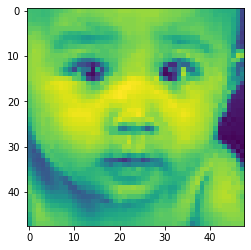

In [ ]:
plt.imshow(np.array(X[0]).reshape(48,48))

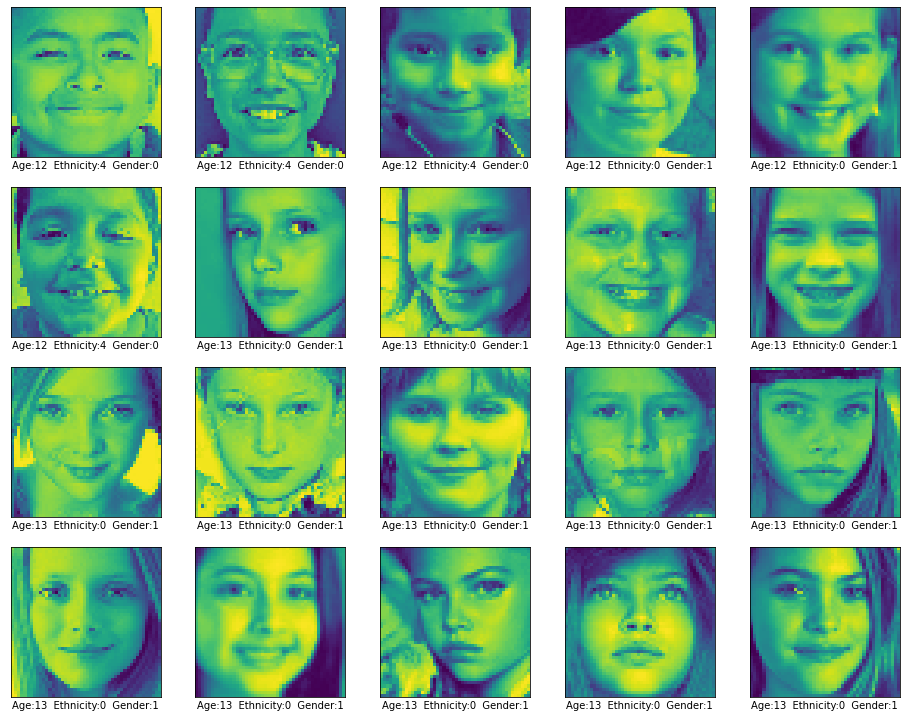

In [ ]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

In [ ]:
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='sgd',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                        

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
260/260 [==============================] - 57s 218ms/step - loss: 0.5141 - accuracy: 0.7452 - val_loss: 0.5867 - val_accuracy: 0.8172
Epoch 2/50
260/260 [==============================] - 58s 225ms/step - loss: 0.3941 - accuracy: 0.8221 - val_loss: 0.3984 - val_accuracy: 0.8545
Epoch 3/50
260/260 [==============================] - 57s 220ms/step - loss: 0.3521 - accuracy: 0.8441 - val_loss: 0.3178 - val_accuracy: 0.8545
Epoch 4/50
260/260 [==============================] - 59s 227ms/step - loss: 0.3292 - accuracy: 0.8566 - val_loss: 0.3210 - val_accuracy: 0.8513
Epoch 5/50
260/260 [==============================] - 57s 218ms/step - loss: 0.3168 - accuracy: 0.8603 - val_loss: 0.2874 - val_accuracy: 0.8734
Epoch 6/50
260/260 [==============================] - 58s 225ms/step - loss: 0.3023 - accuracy: 0.8682 - val_loss: 0.2758 - val_accuracy: 0.8778
Epoch 7/50
260/260 [==============================] - 57s 218ms/step - loss: 0.2874 - accuracy: 0.8747 - val_loss: 0.2712 - val_ac

In [ ]:
model.save("age.h5")

In [ ]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2688155472278595
Test Accuracy: 0.9008818864822388


In [ ]:
y = df['ethnicity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=37)

In [ ]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(5)
])

In [ ]:
model.compile(optimizer='rmsprop',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
history = model.fit(X_train, y_train, epochs=16, validation_split=0.1, batch_size=64)

Epoch 1/16
260/260 [==============================] - 42s 160ms/step - loss: 1.2131 - accuracy: 0.5409 - val_loss: 0.9097 - val_accuracy: 0.6766
Epoch 2/16
260/260 [==============================] - 42s 160ms/step - loss: 0.9380 - accuracy: 0.6694 - val_loss: 0.7994 - val_accuracy: 0.7231
Epoch 3/16
260/260 [==============================] - 43s 166ms/step - loss: 0.8554 - accuracy: 0.7059 - val_loss: 0.7358 - val_accuracy: 0.7436
Epoch 4/16
260/260 [==============================] - 42s 160ms/step - loss: 0.8003 - accuracy: 0.7241 - val_loss: 0.6584 - val_accuracy: 0.7691
Epoch 5/16
260/260 [==============================] - 42s 160ms/step - loss: 0.7538 - accuracy: 0.7441 - val_loss: 0.6664 - val_accuracy: 0.7669
Epoch 6/16
260/260 [==============================] - 43s 165ms/step - loss: 0.7182 - accuracy: 0.7553 - val_loss: 0.6392 - val_accuracy: 0.7734
Epoch 7/16
260/260 [==============================] - 41s 159ms/step - loss: 0.6833 - accuracy: 0.7648 - val_loss: 0.6110 - val_ac

In [ ]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

In [ ]:
y = df['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

In [ ]:
sgd = tf.keras.optimizers.SGD(momentum=0.9)

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

Epoch 1/20
232/232 [==============================] - 60s 255ms/step - loss: 352.9563 - mae: 14.2651 - val_loss: 1128.4778 - val_mae: 27.7853
Epoch 2/20
232/232 [==============================] - 57s 247ms/step - loss: 223.6491 - mae: 11.3593 - val_loss: 432.5341 - val_mae: 15.6117
Epoch 3/20
232/232 [==============================] - 59s 253ms/step - loss: 188.2626 - mae: 10.2351 - val_loss: 264.1825 - val_mae: 12.0364
Epoch 4/20
232/232 [==============================] - 58s 249ms/step - loss: 164.2525 - mae: 9.5607 - val_loss: 415.4745 - val_mae: 17.8353
Epoch 5/20
232/232 [==============================] - 59s 255ms/step - loss: 155.2848 - mae: 9.2370 - val_loss: 106.2325 - val_mae: 7.5132
Epoch 6/20
232/232 [==============================] - 57s 247ms/step - loss: 145.0361 - mae: 8.9345 - val_loss: 224.4388 - val_mae: 12.4548
Epoch 7/20
232/232 [==============================] - 59s 255ms/step - loss: 136.2577 - mae: 8.6489 - val_loss: 194.8417 - val_mae: 10.1698
Epoch 8/20
232/23

In [ ]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [ ]:
mse, mae = model.evaluate(X_test,y_test,verbose=0)
print('Test Mean squared error: {}'.format(mse))
print('Test Mean absolute error: {}'.format(mae))

Test Mean squared error: 97.46709442138672
Test Mean absolute error: 7.3929548263549805


In [ ]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/facenet_keras.h5")

In [ ]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                

In [ ]:
import cv2

In [ ]:
backtorgb = cv2.cvtColor(X,cv2.COLOR_GRAY2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


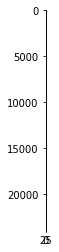

In [ ]:
plt.imshow(backtorgb)

In [ ]:
df['pixels']=df['pixels'].apply(lambda x:x/255)